In [1]:
import pandas as pd

In [5]:
data = pd.read_csv("Groceries_dataset.csv")
data

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [7]:
import pandas as pd
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


<BarContainer object of 3898 artists>

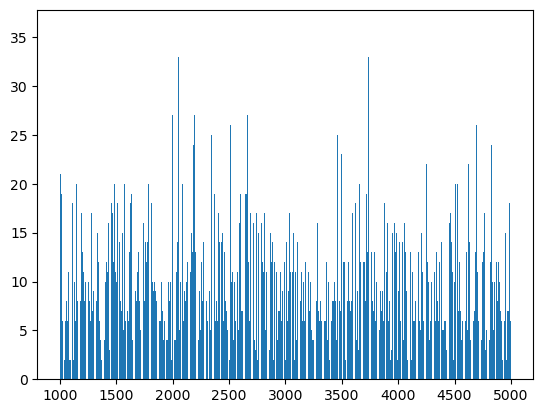

In [33]:
counts = data['Member_number'].value_counts()
plt.bar(counts.index, counts.values)

In [35]:
df = pd.get_dummies(data, dtype=int)
df.head()

,Member_number,Date_01-01-2014,Date_01-01-2015,Date_01-02-2014,Date_01-02-2015,Date_01-03-2014,Date_01-03-2015,Date_01-04-2014,Date_01-04-2015,Date_01-05-2014,...,itemDescription_turkey,itemDescription_vinegar,itemDescription_waffles,itemDescription_whipped/sour cream,itemDescription_whisky,itemDescription_white bread,itemDescription_white wine,itemDescription_whole milk,itemDescription_yogurt,itemDescription_zwieback
0,1808,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [71]:
!pip install mlxtend

In [91]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
print(frequent_itemsets)

   support        itemsets
0     0.50         (item1)
1     0.50         (item2)
2     0.75         (item3)
3     0.25  (item2, item1)
4     0.25  (item3, item1)
5     0.25  (item2, item3)


C:\Users\Uma Devi\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [85]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(item2),(item1),0.5,0.5,0.25,0.5,1.0,1.0,0.0,1.0,0.0,0.333333,0.0,0.5
1,(item1),(item2),0.5,0.5,0.25,0.5,1.0,1.0,0.0,1.0,0.0,0.333333,0.0,0.5


In [87]:
rules.sort_values(by='lift', ascending = False)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(item2),(item1),0.5,0.5,0.25,0.5,1.0,1.0,0.0,1.0,0.0,0.333333,0.0,0.5
1,(item1),(item2),0.5,0.5,0.25,0.5,1.0,1.0,0.0,1.0,0.0,0.333333,0.0,0.5


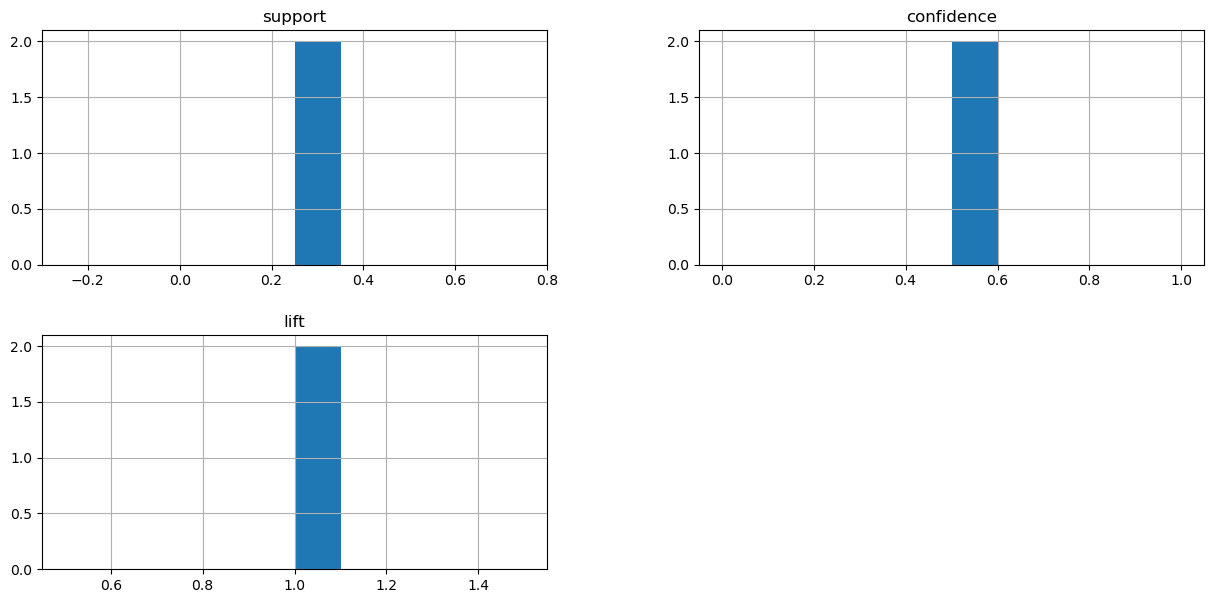

In [89]:
import matplotlib.pyplot as plt
rules[['support','confidence','lift']].hist(figsize=(15,7))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

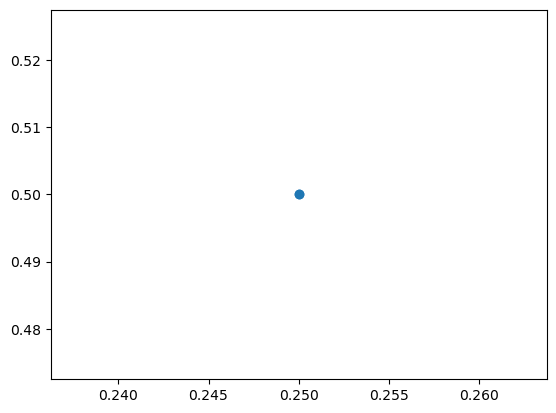

In [93]:
import matplotlib.pyplot as plt

plt.scatter(rules['support'], rules['confidence'])
plt.show